## USing ACRIMA

In [1]:
#importing all the necessary libraries
import numpy as np
import pandas as pd 
import os
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import Sequential, layers, Model
%matplotlib inline

In [2]:
#Reading all the images 
from tqdm import tqdm
import cv2
DATADIR = r'C:\Users\nithu\Documents\Project\Gluacoma Detection\New folder\ACRIMA\Combined'

CATEGORIES = ["Positive", "Negative"]

IMAGE_SIZE = (200,200)
training_data = []
Class = []
def create_training_data():
    for category in CATEGORIES:  
        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  
        for img in tqdm(os.listdir(path)[1:]):  
            img_array = cv2.imread(os.path.join(path,img))  
            new_array = cv2.resize(img_array, (IMAGE_SIZE[0], IMAGE_SIZE[1]))  
            training_data.append(new_array) 
            if category == 'Positive':
                Class.append(1)
            else:
                Class.append(0)

create_training_data()

100%|███████████████████████████████████████████████████████████████████████████████| 309/309 [00:01<00:00, 191.89it/s]


In [3]:
df = pd.DataFrame({'Images': training_data,
                  'Class': Class})

In [4]:
df['Class'].value_counts()

1    396
0    309
Name: Class, dtype: int64

In [5]:
df['Images'] = df['Images']/255

In [6]:
x = df['Images']
y = df['Class']

In [7]:
# Splitting the images into train, test, validation
from sklearn.model_selection import train_test_split

x_temp, x_test, y_temp, y_test = train_test_split(x,y,test_size=0.2,train_size=0.8)
x_train, x_validation, y_train, y_validation = train_test_split(x_temp,y_temp,test_size = 0.2,train_size =0.80)

In [8]:
#Converting to array format
X_image_train_stacked = np.stack(x_train.values)
X_image_validation_stacked = np.stack(x_validation.values)
X_image_test_stacked = np.stack(x_test.values)

In [18]:
#Training the model
model = Sequential([layers.Conv2D(filters=32, kernel_size=(3,3), padding='valid', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(filters=64, kernel_size=(3,3), padding='valid', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(filters=32, kernel_size=(3,3), padding='valid', activation='relu'),
  layers.MaxPooling2D(),

                    
  layers.Flatten(),
  layers.Dense(256, activation='relu'),                
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
              
hist=model.fit(X_image_train_stacked, y_train, epochs=10, validation_data=(X_image_validation_stacked,y_validation)) 

Epoch 1/10
15/15 [==============================] - 21s 1s/step - loss: 0.6673 - accuracy: 0.6652 - val_loss: 0.4958 - val_accuracy: 0.7257
Epoch 2/10
15/15 [==============================] - 15s 957ms/step - loss: 0.5032 - accuracy: 0.7650 - val_loss: 0.4848 - val_accuracy: 0.7345
Epoch 3/10
15/15 [==============================] - 14s 931ms/step - loss: 0.3737 - accuracy: 0.8426 - val_loss: 0.4514 - val_accuracy: 0.8053
Epoch 4/10
15/15 [==============================] - 14s 901ms/step - loss: 0.3538 - accuracy: 0.8448 - val_loss: 0.2995 - val_accuracy: 0.8673
Epoch 5/10
15/15 [==============================] - 13s 880ms/step - loss: 0.2791 - accuracy: 0.8714 - val_loss: 0.3127 - val_accuracy: 0.8850
Epoch 6/10
15/15 [==============================] - 13s 878ms/step - loss: 0.2690 - accuracy: 0.8803 - val_loss: 0.3285 - val_accuracy: 0.8584
Epoch 7/10
15/15 [==============================] - 13s 848ms/step - loss: 0.2686 - accuracy: 0.9047 - val_loss: 0.2423 - val_accuracy: 0.9027
Ep

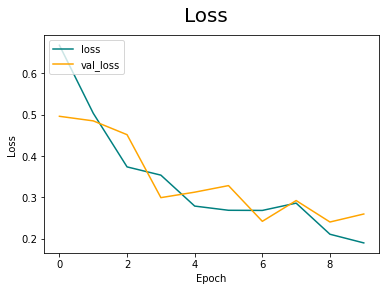

In [19]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc="upper left")
plt.show()

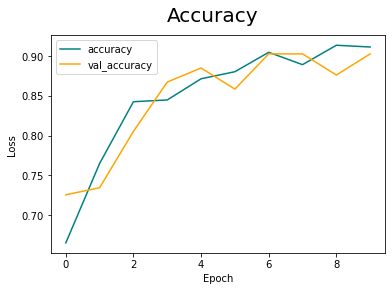

In [20]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc="upper left")
plt.show()

In [21]:
#Evaluating the accuracy for the model
model.evaluate(X_image_test_stacked,y_test)

5/5 [==============================] - 1s 128ms/step - loss: 0.1788 - accuracy: 0.9574


[0.17877738177776337, 0.957446813583374]

In [22]:
#Predicting for test dataset
y_pred = model.predict(X_image_test_stacked)
y_pred_conv = []
for i in y_pred:
    if i[0] > i[1]:
        y_pred_conv.append(0)
    else:
        y_pred_conv.append(1)

5/5 [==============================] - 1s 129ms/step


ACCURACY SCORE:  0.9574468085106383

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        70
           1       0.97      0.94      0.96        71

    accuracy                           0.96       141
   macro avg       0.96      0.96      0.96       141
weighted avg       0.96      0.96      0.96       141

CONFUSION MATRIX:


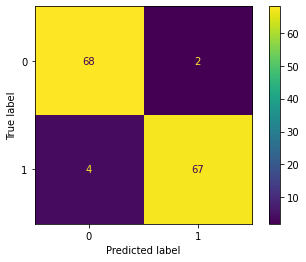

In [23]:
#Plotting confusion martix and classification report
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


print("ACCURACY SCORE: ", accuracy_score(y_test,y_pred_conv))
print()
print("CLASSIFICATION REPORT:")
print(classification_report(y_test,y_pred_conv))
a = confusion_matrix(y_test,y_pred_conv)
result = ConfusionMatrixDisplay(a)
print("CONFUSION MATRIX:")
result.plot()
plt.show()